# **LIMPIEZA DE DATOS**

In [477]:
%matplotlib notebook
%matplotlib inline

CARGA DE LIBRERIAS

In [478]:
import pandas as pd
import numpy as np
import os
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns

CARGA DE FICHEROS

In [479]:
CARPETA_DATOS_ORIGINALES = 'Datos/Originales/'
df_sabi_1= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_1.xlsx'))
df_sabi_2= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_2_new.xlsx'))
df_dealroom= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_dealroom_modif.xlsx'))
df_sabi_3= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_parte3.xlsx'))

c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


VISUALIZACIi“N DE FICHEROS

In [480]:
df_sabi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Codigo_NIF                  412 non-null    object 
 1   Nombre_sabi                 412 non-null    object 
 2   Localidad                   412 non-null    object 
 3   Fecha constitucion          412 non-null    object 
 4   Codigo consolidacion        412 non-null    object 
 5   Codigo primario CNAE 2009   412 non-null    int64  
 6   Forma juridica              412 non-null    object 
 7   Forma juridica detallada    412 non-null    object 
 8   Estado                      412 non-null    object 
 9   Estado detallado            412 non-null    object 
 10  Capital social mil EUR      412 non-null    float64
 11  Free capital mil EUR        412 non-null    float64
 12  Porcentaje_adquisicion_cat  412 non-null    int64  
dtypes: float64(2), int64(2), object(9)


In [481]:
df_sabi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Codigo_NIF                                                  824 non-null    object 
 1   year                                                        824 non-null    int64  
 2   Acreedores a L. P. mil EUR                                  612 non-null    float64
 3   Acreedores comerciales mil EUR                              565 non-null    float64
 4   Activo circulante mil EUR                                   815 non-null    float64
 5   Apalancamiento (%) %                                        816 non-null    float64
 6   Capital suscrito mil EUR                                    816 non-null    float64
 7   Cash flow mil EUR                                           816 non-null    float64
 8   

In [482]:
df_dealroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Codigo_NIF            412 non-null    object 
 1   name_dealroom         412 non-null    object 
 2   profile_url           412 non-null    object 
 3   website               412 non-null    object 
 4   tagline               356 non-null    object 
 5   total_funding         381 non-null    float64
 6   first_funding_date    364 non-null    object 
 7   last_funding_date     364 non-null    object 
 8   last_funding          196 non-null    float64
 9   last_round            342 non-null    object 
 10  total_rounds          412 non-null    int64  
 11  n_empleados_dealroom  107 non-null    float64
 12  ownerships            345 non-null    object 
 13  b2b_b2c               397 non-null    object 
 14  revenue_models        228 non-null    object 
 15  growth_stage          4

In [483]:
print(df_sabi_1.isna().sum())
print(df_sabi_1.shape)

Codigo_NIF                    0
Nombre_sabi                   0
Localidad                     0
Fecha constitucion            0
Codigo consolidacion          0
Codigo primario CNAE 2009     0
Forma juridica                0
Forma juridica detallada      0
Estado                        0
Estado detallado              0
Capital social mil EUR        0
Free capital mil EUR          0
Porcentaje_adquisicion_cat    0
dtype: int64
(412, 13)


In [484]:
df_sabi_2.columns

Index(['Codigo_NIF', 'year', 'Acreedores a L. P. mil EUR',
       'Acreedores comerciales mil EUR', 'Activo circulante mil EUR',
       'Apalancamiento (%) %', 'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Existencias mil EUR', 'Fondo de maniobra mil EUR',
       'Fondos propios mil EUR', 'Gastos financieros mil EUR',
       'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotación mil EUR', 'Inmovilizado inmaterial mil EUR',
       'Inmovilizado material mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Número empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR',
       'Pasivo líquido mil EUR', 'Período de cobro (días) días',
       'Ratio de liquidez %', 'Ratio de solvencia %',
       'Rentabilidad económica (%) %', 'Rentabilidad financiera (%) %',
       'Result. ordinarios antes Impuestos mil EUR',
       'Resultado Actividades Ordinarias 

Codigo_NIF                                                      0
year                                                            0
Acreedores a L. P. mil EUR                                    212
Acreedores comerciales mil EUR                                259
Activo circulante mil EUR                                       9
Apalancamiento (%) %                                            8
Capital suscrito mil EUR                                        8
Cash flow mil EUR                                               8
Deudas financieras mil EUR                                    400
EBITDA mil EUR                                                  9
Endeudamiento (%) %                                             8
Existencias mil EUR                                           434
Fondo de maniobra mil EUR                                      11
Fondos propios mil EUR                                          8
Gastos financieros mil EUR                                      8
Importe ne

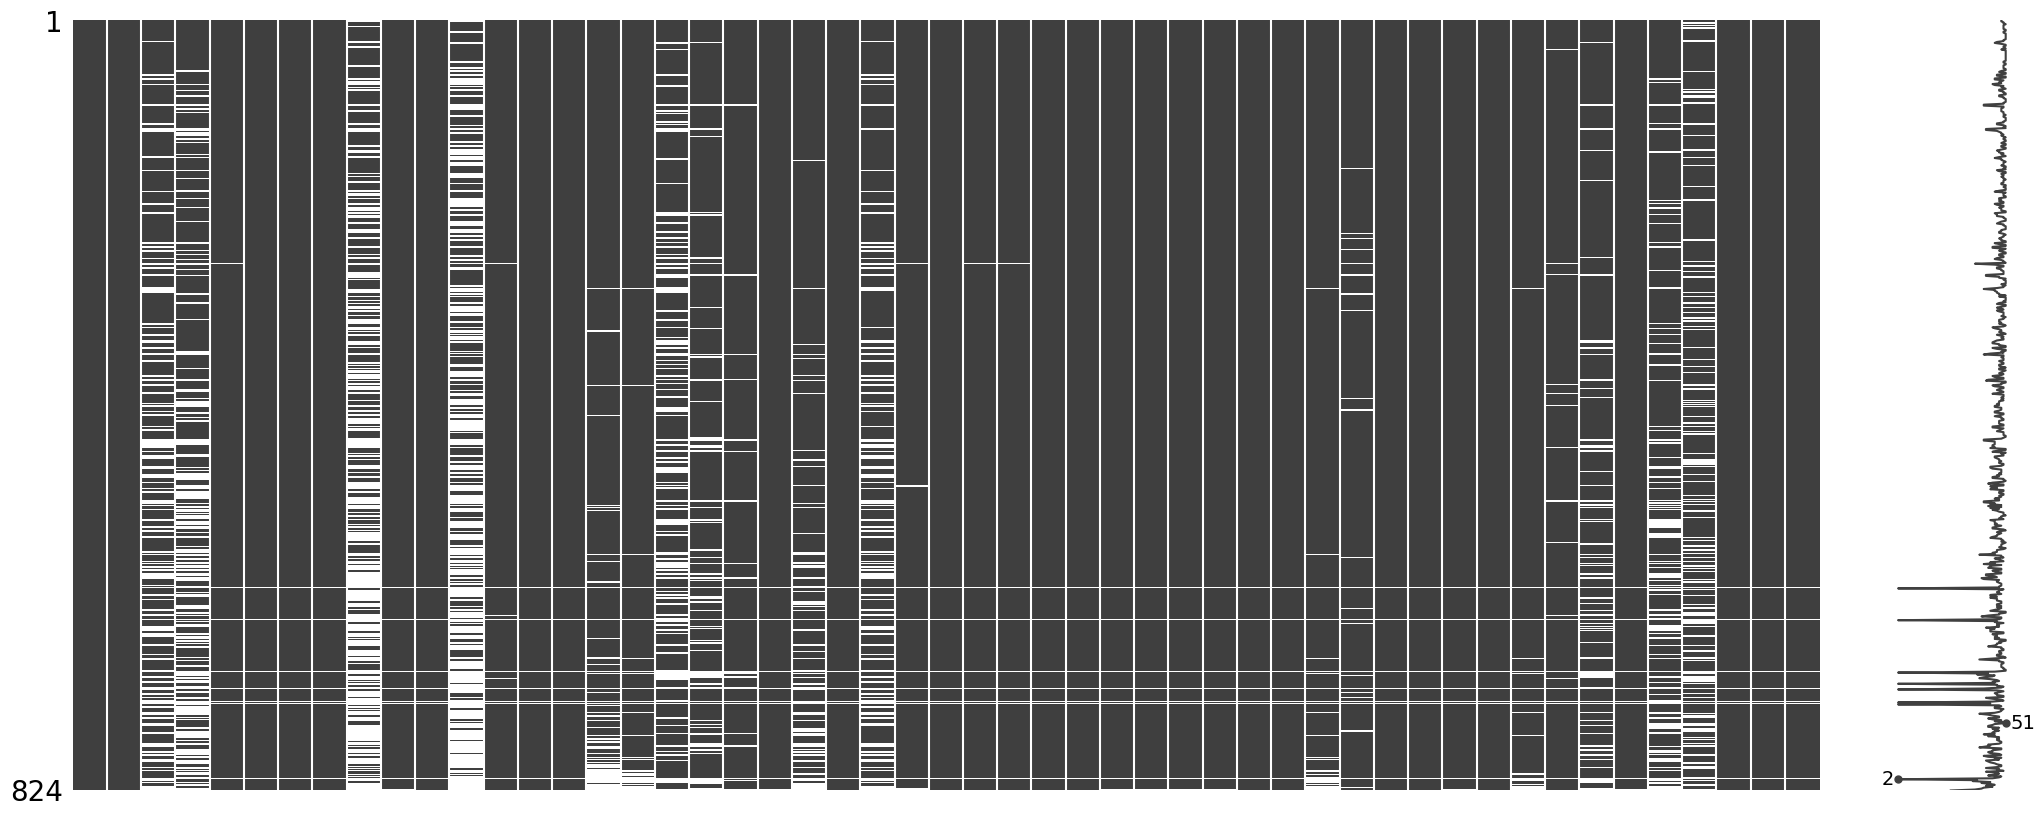

In [485]:
print(df_sabi_2.isna().sum())
print(msno.matrix(df_sabi_2))

Codigo_NIF                                                  0
year                                                        0
Beneficio por empleado mil                                  9
Capital circulante por empleado mil                         8
Consumo de mercaderías y de materias mil EUR              824
Coste medio de los empleados mil                           52
Gastos de personal mil EUR                                 54
Gastos extraordinarios mil EUR                            824
Ingresos de explotación por empleado mil                   24
Ingresos extraordinarios mil EUR                          824
Ingresos financieros mil EUR                                8
Liquidez general %                                          9
Materiales mil EUR                                        148
Otros Conceptos de Explotación mil EUR                     11
Otros activos fijos mil EUR                               153
Otros activos líquidos mil EUR                             21
Otros ga

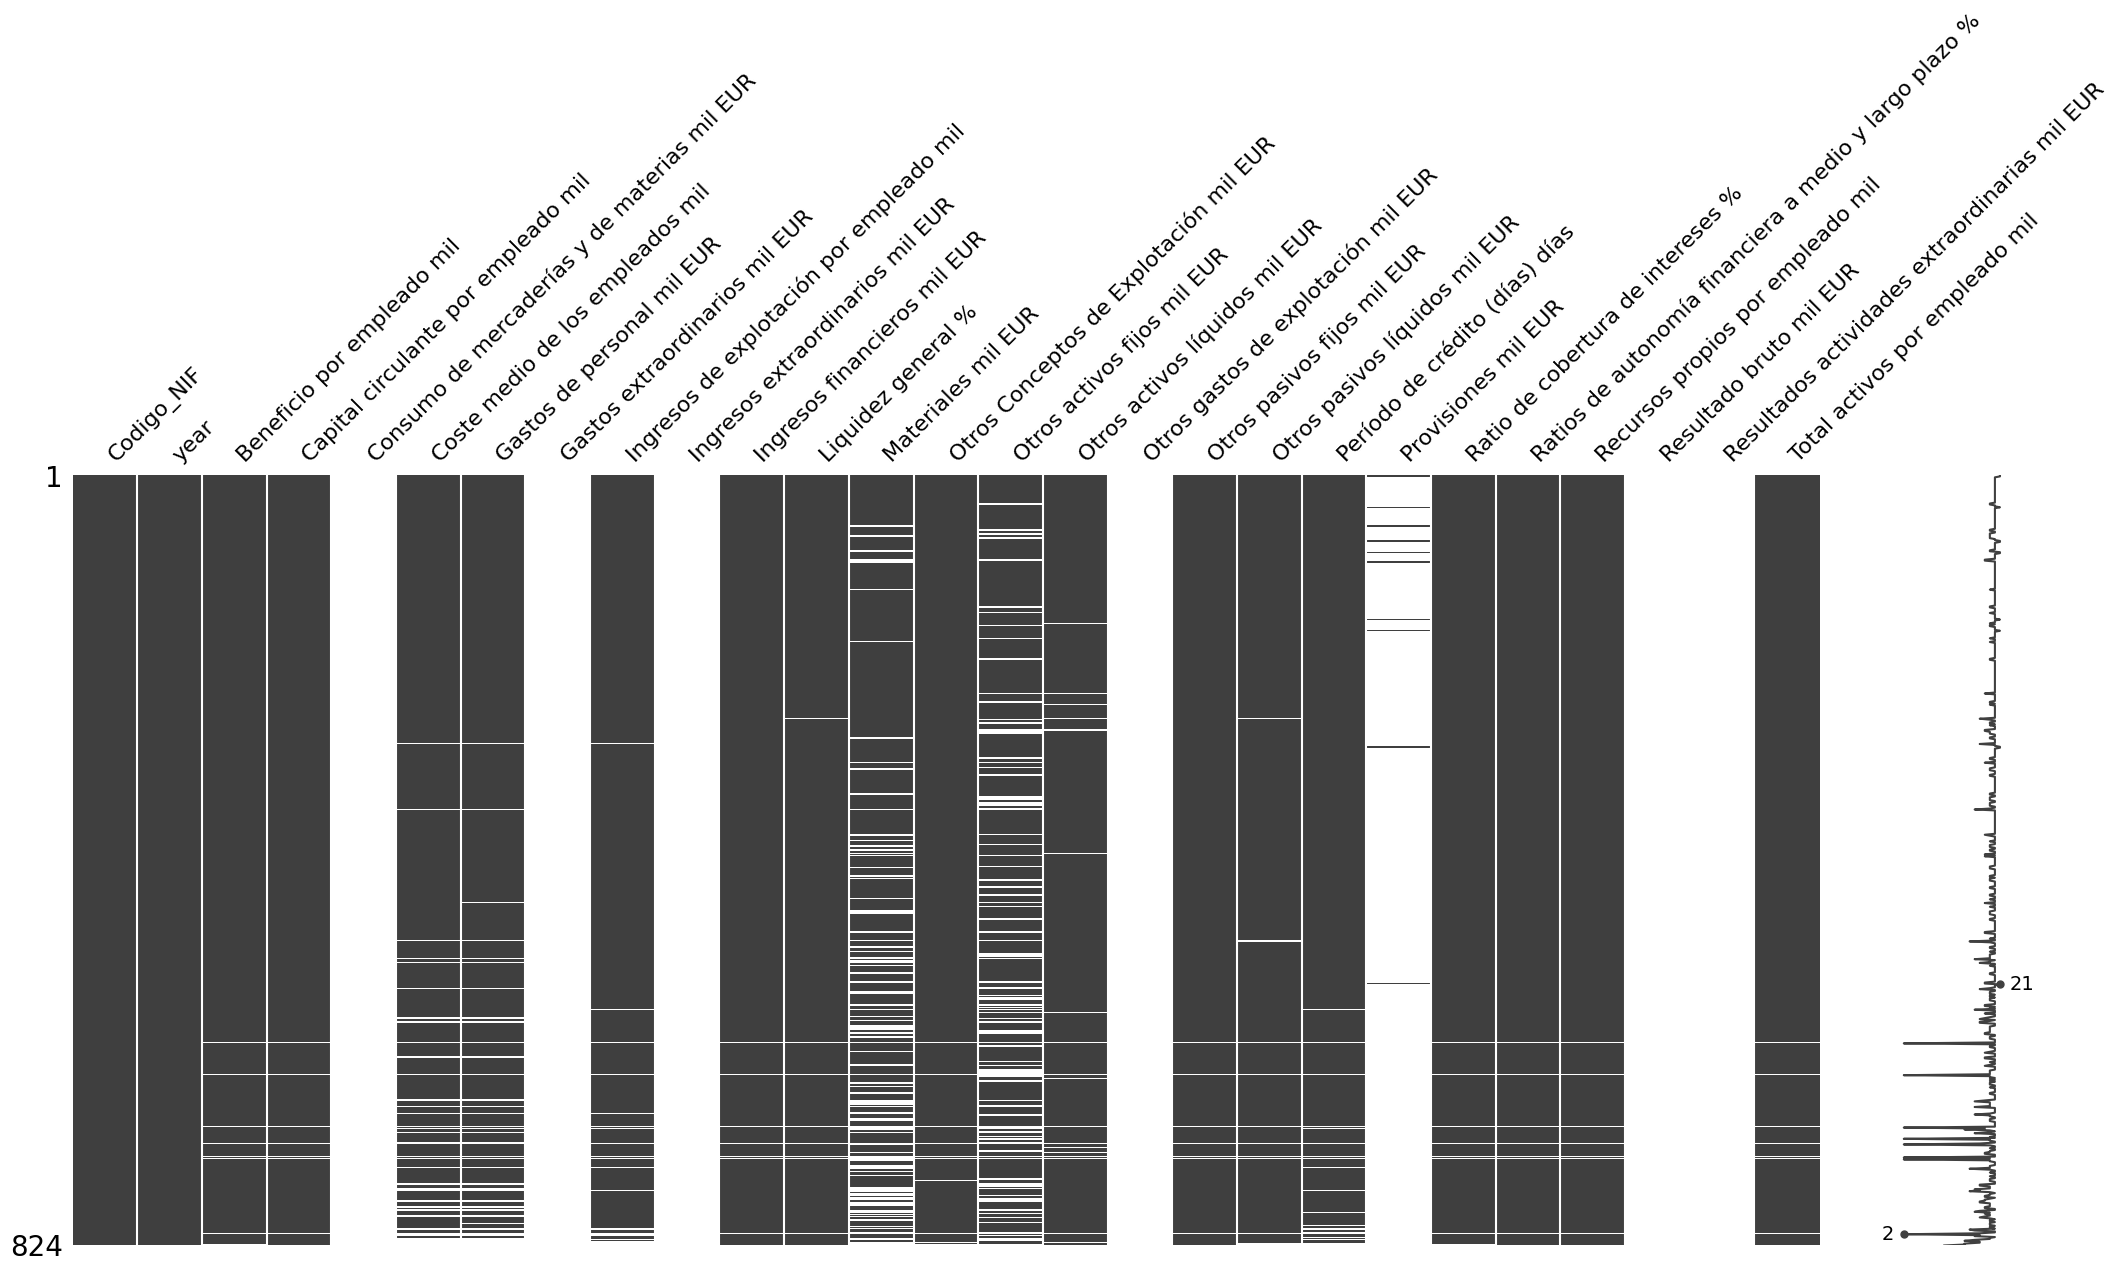

In [486]:
print(df_sabi_3.isna().sum())
print(msno.matrix(df_sabi_3))

CONVERSION DE VALORES Y CREACION DE VARIABLES

###### df_sabi2

In [487]:
# pasamos el n.s. a NaN con applymap
df_sabi_2=df_sabi_2.applymap(lambda x: np.nan if x=='n.s.' else x)
df_sabi_3=df_sabi_3.applymap(lambda x: np.nan if x=='n.s.' else x)

In [488]:
print(df_sabi_2.shape)
# se calcula la cantidad de nulos por fila
# print(df_sabi_2.isna().sum(axis=1)[df_sabi_2.isna().sum(axis=1)>8])
indices_missings= df_sabi_2.isna().sum(axis=1)[df_sabi_2.isna().sum(axis=1)>8].index
print(df_sabi_2.iloc[indices_missings,:])

(824, 51)
    Codigo_NIF  year  Acreedores a L. P. mil EUR  \
90   B75219261  2021                         NaN   
91   B75219261  2020                         NaN   
116  B01518620  2021                         NaN   
117  B01518620  2020                         NaN   
260  B75157081  2021                         NaN   
..         ...   ...                         ...   
818  B01563881  2021                    30.64454   
820  B95626842  2021                         NaN   
821  B95626842  2020                         NaN   
822  B95992509  2021                         NaN   
823  B95992509  2020                         NaN   

     Acreedores comerciales mil EUR  Activo circulante mil EUR  \
90                              NaN                 1532.43809   
91                              NaN                  505.32821   
116                             NaN                 1074.15346   
117                             NaN                 1025.11823   
260                             NaN

In [489]:
# se crea columna con numero de missing por fila
df_sabi_2['n_missings']= df_sabi_2.isna().sum(axis=1)

In [490]:
# se saca el codigo_nif de las empresas que tienen mas de 20 missings
empresas_missings= df_sabi_2[df_sabi_2['n_missings']>20]['Codigo_NIF'].unique()
empresas_missings

array(['B05496914', 'B02808889', 'B42938407', 'B02943348', 'B02952505',
       'B02752228', 'B02793743', 'B02731099', 'B95992509'], dtype=object)

In [491]:
# se elimina las empresas con mas de 20 missings
df_sabi_2= df_sabi_2[~df_sabi_2['Codigo_NIF'].isin(empresas_missings)]
print(df_sabi_2.shape)
# lo mismo con df_sabi_1
df_sabi_1= df_sabi_1[~df_sabi_1['Codigo_NIF'].isin(empresas_missings)]
print(df_sabi_1.shape)
# tambien con df_dealroom
df_dealroom= df_dealroom[~df_dealroom['Codigo_NIF'].isin(empresas_missings)]
print(df_dealroom.shape)

(806, 52)
(403, 13)
(403, 18)


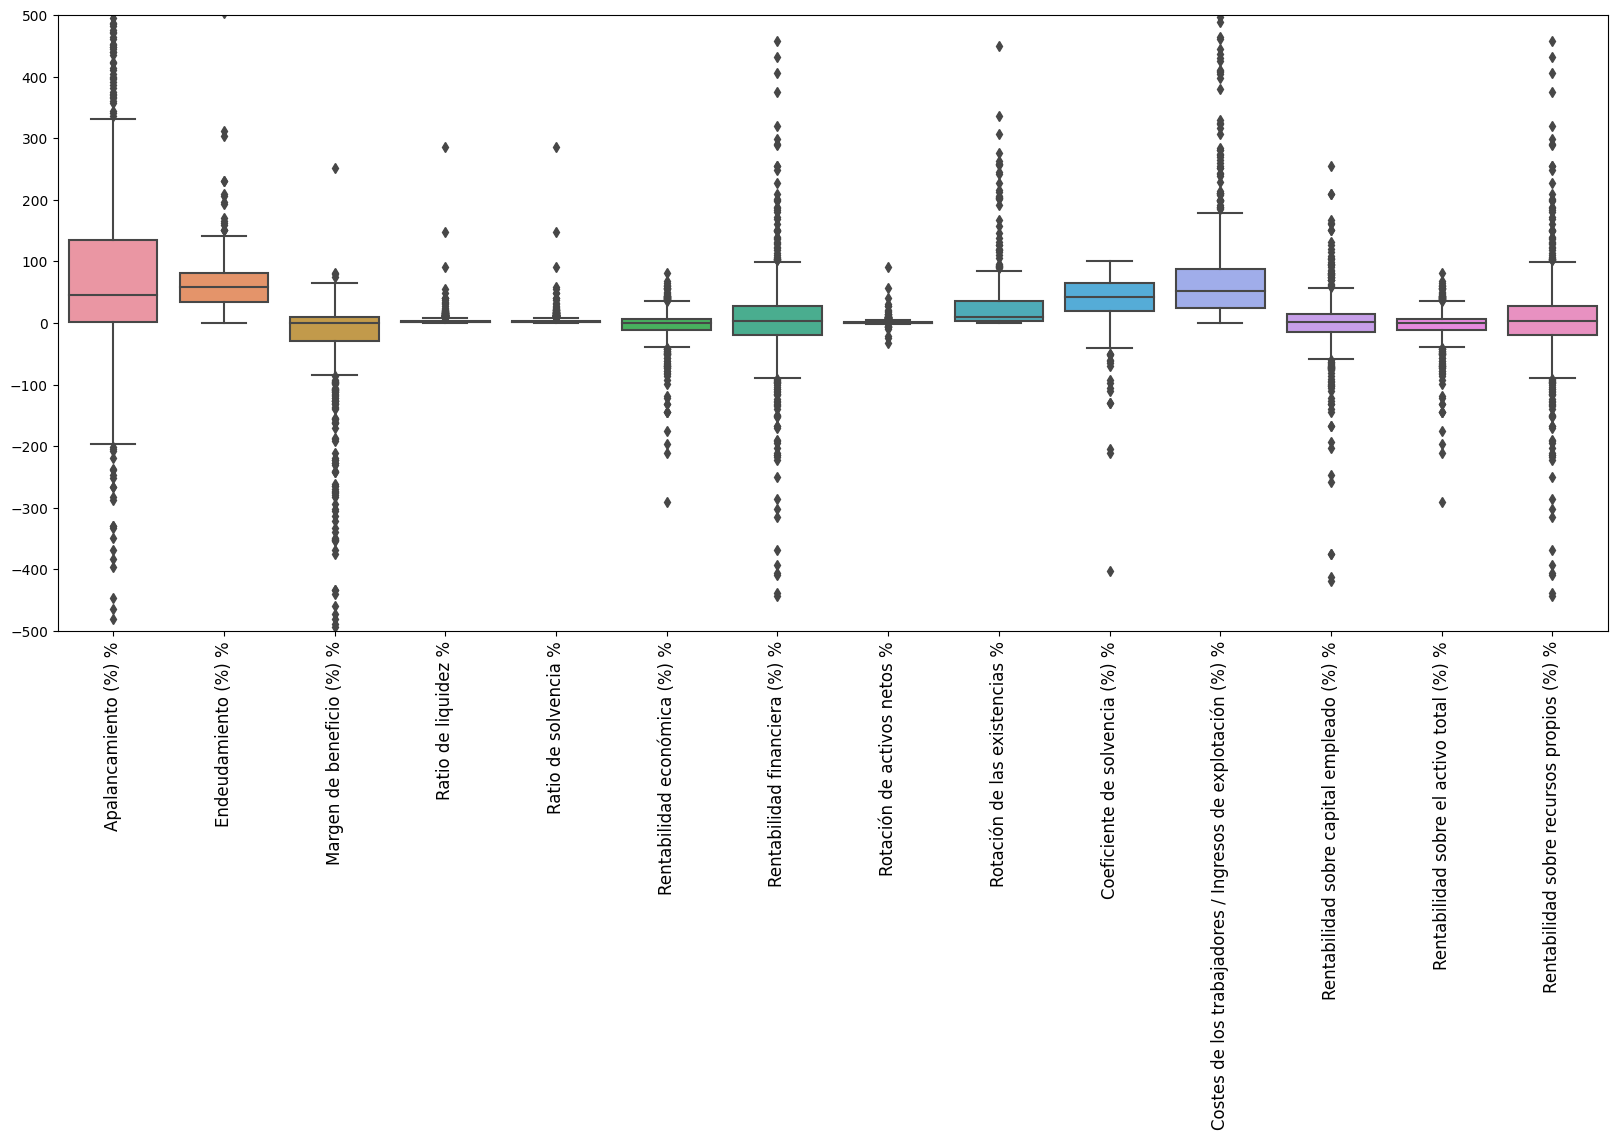

In [492]:
#Se realizan boxplots de las columnas numericas que esti©n mostradas en %.
df_sabi_2_porcentaje = df_sabi_2.loc[:, df_sabi_2.columns.str.contains('%')]
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df_sabi_2_porcentaje, ax=ax)
plt.xticks(rotation=90)
ax.set_ylim(-500, 500)
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.show()

###### df_sabi_3

In [493]:
# de df_sabi_3 nos quedamos solo con 4 variables
df_sabi_3_final= df_sabi_3[['Codigo_NIF','year', 'Gastos de personal mil EUR', 'Coste medio de los empleados mil', 'Liquidez general %']]

VISUALIZACION DE VALORES AUSENTES

In [494]:
print(df_dealroom.isna().sum())

Codigo_NIF                0
name_dealroom             0
profile_url               0
website                   0
tagline                  56
total_funding            31
first_funding_date       47
last_funding_date        47
last_funding            211
last_round               69
total_rounds              0
n_empleados_dealroom    297
ownerships               67
b2b_b2c                  15
revenue_models          180
growth_stage              1
company_status            0
valuation_2022          343
dtype: int64


In [495]:
df_dealroom.describe()

,total_funding,last_funding,total_rounds,n_empleados_dealroom,valuation_2022
count,372.000000,192.000000,403.000000,106.000000,60.000000
mean,0.875685,0.915474,3.724566,29.990566,14.866000
std,6.173921,7.534666,3.070655,44.610803,31.307508
min,0.000000,0.001000,0.000000,1.000000,0.090000
25%,0.030000,0.010000,2.000000,7.000000,1.267500
50%,0.050000,0.030000,3.000000,18.000000,4.460000
75%,0.150000,0.090000,5.000000,37.750000,10.855000
max,100.000000,100.000000,24.000000,347.000000,156.400000


In [496]:
# se sustituyen las letras con tildes por las letras sin tildes de todas las columnas de df_sabi_2
df_sabi_2.columns= df_sabi_2.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# lo mismo con el resto de dataframes
df_sabi_1.columns= df_sabi_1.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_dealroom.columns= df_dealroom.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_sabi_3_final.columns= df_sabi_3_final.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

<AxesSubplot: >

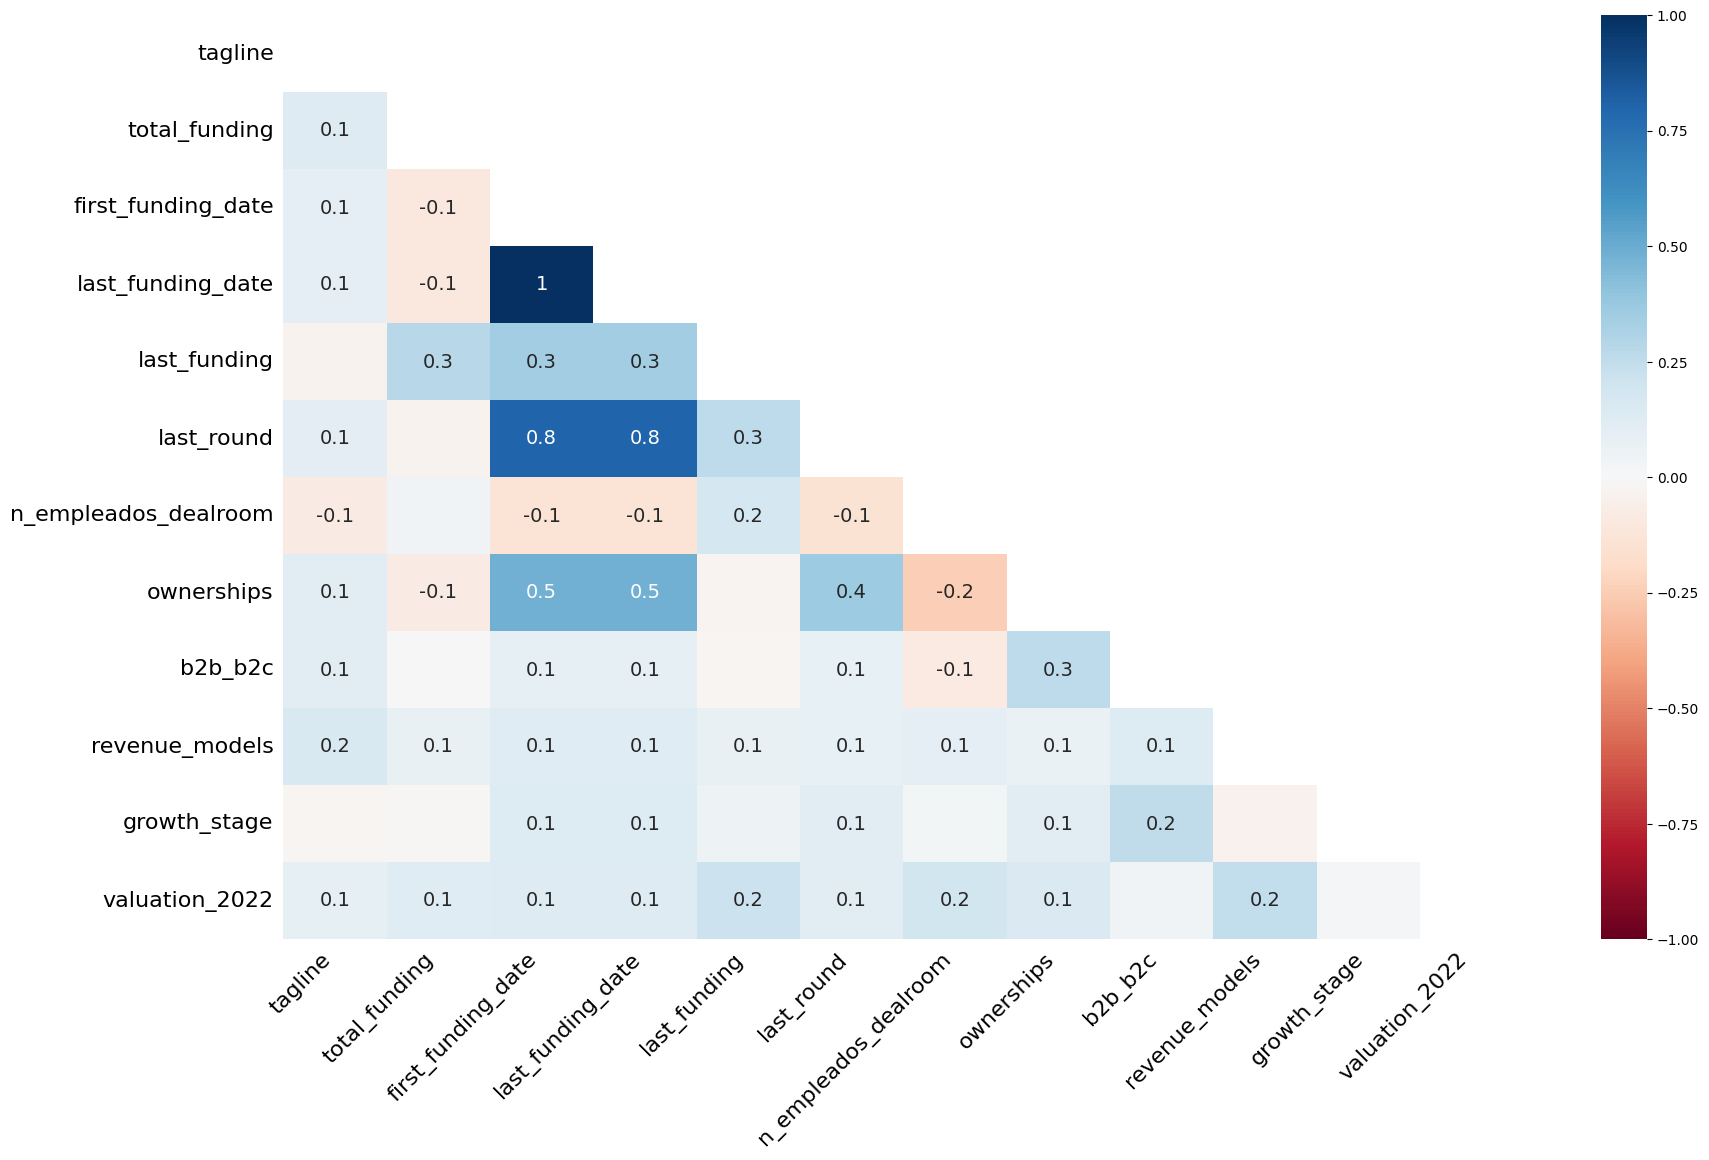

In [497]:
# correlograma de missing values
msno.heatmap(df_dealroom)

In [498]:
# columnas financieras
columnas_financieras= df_sabi_2.columns 
columnas_financieras= columnas_financieras.append(df_sabi_3_final.columns)
columnas_financieras.shape

(57,)

In [499]:
df_dealroom[df_dealroom['n_empleados_dealroom'].isna()]

,Codigo_NIF,name_dealroom,profile_url,website,tagline,total_funding,first_funding_date,last_funding_date,last_funding,last_round,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022
0,A78053147,Hostalia,https://app.dealroom.co/companies/hostalia,http://hostalia.com,NaN,0.00,NaN,NaN,NaN,NaN,0,NaN,bootstrapped,business,saas,early growth,operational,NaN
8,B01517721,Naivan,https://app.dealroom.co/companies/naivan,http://naivan.com,Laser Cut Folded and CNC Formed,0.00,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,manufacturing,early growth,operational,NaN
10,B75228635,Blue Agro,https://app.dealroom.co/companies/blue_agro,http://blueagro.com,"Conventional fertilizers (nitrogen, NPK, amend...",NaN,sep/2019,sep/2019,NaN,SUPPORT PROGRAM,1,NaN,accelerator,business,NaN,seed,operational,NaN
12,B95745832,Bas Projects,https://app.dealroom.co/companies/bas_projects,http://bascorporation.com,Renewable energy and environment,NaN,dec/2013,dec/2013,NaN,SUPPORT PROGRAM,1,NaN,accelerator,business,NaN,early growth,operational,NaN
13,B95731071,Glefaran,https://app.dealroom.co/companies/glefaran,http://glefaran.com,Combustion of forest biomass for energy produc...,0.73,oct/2013,jan/2016,0.02,GRANT,4,NaN,accelerator,business,NaN,seed,operational,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,B75215228,Bimertek,https://app.dealroom.co/companies/bimertek,http://bimertek.com,A technological startup that resolves complex ...,0.03,jan/2019,dec/2019,NaN,SUPPORT PROGRAM,3,NaN,accelerator,business,saas,seed,operational,NaN
404,B75172163,Biotech Foods,https://app.dealroom.co/companies/biotech_foods,http://www.biotech-foods.com,Developing technology to produce Ethicameat: F...,10.44,jan/2017,nov/2021,NaN,ACQUISITION,8,NaN,Subsidiary;Venture Capital;accelerator,business;consumer,manufacturing,early growth,acquired,11.41
406,B95879177,Rotarm Solar Solutions,https://app.dealroom.co/companies/rotarm_solar...,http://rotarm.com,Equipment for installations related to energy ...,0.07,jan/2017,jun/2017,NaN,SUPPORT PROGRAM,3,NaN,accelerator,business,saas,seed,operational,NaN
407,B95957643,Safybox,https://app.dealroom.co/companies/safybox,http://delibertyprimemailbox.com,Offers technological and innovative solutions ...,0.02,jan/2021,jan/2021,NaN,SUPPORT PROGRAM,2,NaN,accelerator,business,saas,seed,operational,NaN


CONVERSION DE VARIABLES

In [500]:
# se convierte la primera letra de cada palabra a mayuscula
df_dealroom['last_funding_date']= df_dealroom['last_funding_date'].str.capitalize()
df_dealroom['first_funding_date']= df_dealroom['first_funding_date'].str.capitalize()
# hay un valor de fecha que aparece solo el ai±o, se pasa a formato mes/ai±o
indice = df_dealroom[df_dealroom['last_funding_date']=='2021'].index[0]
df_dealroom.at[indice, 'last_funding_date'] = 'Jan/2021'
indice = df_dealroom[df_dealroom['first_funding_date']=='2003'].index[0]
df_dealroom.at[indice, 'first_funding_date'] = 'Jan/2003'
indice = df_dealroom[df_dealroom['first_funding_date']=='2017'].index[0]
df_dealroom.at[indice, 'first_funding_date'] = 'Jan/2017'
# se pasan las fechas a datetime
df_dealroom['last_funding_date']= pd.to_datetime(df_dealroom['last_funding_date'], format='%b/%Y')
df_dealroom['first_funding_date']= pd.to_datetime(df_dealroom['first_funding_date'], format='%b/%Y')


In [501]:
print(df_dealroom['b2b_b2c'].value_counts())
print(df_dealroom['b2b_b2c'].isna().sum())

business             308
consumer              66
business;consumer     14
Name: b2b_b2c, dtype: int64
15


In [502]:
# se cogen las empresas que el campo b2b_b2c es NaN
empresas_b2b_b2c_nan= df_dealroom[df_dealroom['b2b_b2c'].isna()]
empresas_b2b_b2c_nan

,Codigo_NIF,name_dealroom,profile_url,website,tagline,total_funding,first_funding_date,last_funding_date,last_funding,last_round,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022
8,B01517721,Naivan,https://app.dealroom.co/companies/naivan,http://naivan.com,Laser Cut Folded and CNC Formed,0.000,NaT,NaT,NaN,NaN,0,NaN,NaN,NaN,manufacturing,early growth,operational,NaN
24,B20933560,Feelfree Rentals,https://app.dealroom.co/companies/feelfree_ren...,http://www.feelfreerentals.com,Alquiler online de apartamentos turísticos par...,0.000,NaT,NaT,NaN,NaN,0,32.0,NaN,NaN,NaN,early growth,operational,NaN
38,A95291613,VIRTUALWARE,https://app.dealroom.co/companies/virtualware_...,https://www.virtualwareco.com/,NaN,0.560,2009-01-01,2021-01-01,0.020,GRANT,24,52.0,NaN,NaN,NaN,late growth,operational,NaN
90,B75018168,DNA Data,https://app.dealroom.co/companies/dna_data,http://dnadata.es,"We conduct Covid-19 tests, book your appointme...",0.020,2012-01-01,2012-01-01,0.020,GRANT,2,NaN,NaN,NaN,manufacturing,seed,operational,NaN
98,B95336517,Gistek Insurance Solutions,https://app.dealroom.co/companies/gistek_insur...,http://www.gistek-s.com,NaN,0.490,2018-01-01,2021-01-01,0.010,GRANT,4,15.0,Venture Capital,NaN,NaN,early growth,operational,NaN
112,B95285292,lorke systems,https://app.dealroom.co/companies/lorke_systems,http://lorke.es,Lorke Systems manufactures and markets Self-cl...,0.000,NaT,NaT,NaN,NaN,0,NaN,NaN,NaN,manufacturing,NaN,operational,NaN
115,B75140434,Modfie,https://app.dealroom.co/companies/modfie,http://modfie.com,Modfie. Your face. Your smile.,0.100,2015-11-01,2019-06-01,NaN,SERIES A,3,NaN,Venture Capital;accelerator,NaN,NaN,early growth,low-activity,0.28
119,B95694956,Innovative Hall Media Technologies,https://app.dealroom.co/companies/innovative_h...,http://www.innovativehall.com,NaN,0.010,2012-01-01,2012-01-01,0.010,GRANT,1,NaN,NaN,NaN,NaN,seed,operational,NaN
152,B01505254,Solid Machine Vision,https://app.dealroom.co/companies/solid_machin...,https://solidmachinevision.com/en/,Machine Vision Solutions - Industry 4.0 - Seek...,0.000,NaT,NaT,NaN,NaN,0,7.0,NaN,NaN,NaN,seed,operational,NaN
158,B48457402,Anbiolab,https://app.dealroom.co/companies/anbiolab,https://www.anbiolab.com/,NaN,0.030,2018-10-01,2019-01-01,0.030,GRANT,2,NaN,accelerator,NaN,NaN,seed,operational,NaN


In [503]:
# se busca si es b2b o b2c a mano y se crea una funcion para automatizarlo
lista_empresa_consumer= ['Feelfree Rentals', 'Modfie', 'Worldpats', 'Kimet Sport', 'Puntodis', 'DNA Data' ]
lista_empresa_bussines= ['Hub Gasteiz', 'Quevedos Strategic Partners', 'Anbiolab', 'Solid Machine Vision', 'Innovative Hall Media Technologies', 'lorke systems',
'Gistek Insurance Solutions', 'VIRTUALWARE', 'Naivan', ]
for empresa in lista_empresa_consumer:
    df_dealroom.iloc[df_dealroom[df_dealroom['name_dealroom'] == empresa].index[0],13]= 'consumer'
for empresa in lista_empresa_bussines:
    df_dealroom.iloc[df_dealroom[df_dealroom['name_dealroom'] == empresa].index[0],13]= 'business'


In [504]:
# se pasan b2b a 1 en una columna, b2c a 1 en otra, y se dejan los que son ambos a 0
df_dealroom['b2b']= df_dealroom['b2b_b2c'].apply(lambda x: 1 if x=='business' else 0)
df_dealroom['b2c']= df_dealroom['b2b_b2c'].apply(lambda x: 1 if x=='consumer' else 0)

UNIi“N DE LOS DATAFRAMES EN UNO išNICO

In [505]:
# juntamos los dos df_sabi
df_sabi= pd.merge(df_sabi_1, df_sabi_2, on='Codigo_NIF', how='inner')
df_sabi_completo= pd.merge(df_sabi, df_sabi_3_final, on=['Codigo_NIF','year'], how='left')
# juntamos este df con el de dealroom
df= pd.merge(df_sabi_completo, df_dealroom, on='Codigo_NIF', how='inner')
df


,Codigo_NIF,Nombre_sabi,Localidad,Fecha constitucion,Codigo consolidacion,Codigo primario CNAE 2009,Forma juridica,Forma juridica detallada,Estado,Estado detallado,...,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022,b2b,b2c
0,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985/06/05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0,NaN,bootstrapped,business,saas,early growth,operational,NaN,1,0
1,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985/06/05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0,NaN,bootstrapped,business,saas,early growth,operational,NaN,1,0
2,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014/01/21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,1,115.0,accelerator,business,NaN,late growth,operational,NaN,1,0
3,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014/01/21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,1,115.0,accelerator,business,NaN,late growth,operational,NaN,1,0
4,B95864310,HAIZEA BILBAO SOCIEDAD LIMITADA.,ZIERBENA,2016/11/25,U1,2420,Sociedad limitada,Sociedad limitada,Activa,Activa,...,0,135.0,NaN,business,NaN,late growth,operational,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,B99554537,SENSTILE SOCIEDAD LIMITADA.,BILBAO,2019/08/01,U1,6201,Sociedad limitada,Sociedad limitada,Activa,Activa,...,5,1.0,accelerator,business,NaN,seed,operational,NaN,1,0
802,B01563881,"STRUCTURAL DEFORMITY INDEX SYSTEM, SOCIEDAD LI...",VITORIA-GASTEIZ,2018/01/09,U1,6202,Sociedad limitada,Sociedad limitada,Activa,Activa,...,4,NaN,accelerator,business,NaN,seed,operational,NaN,1,0
803,B01563881,"STRUCTURAL DEFORMITY INDEX SYSTEM, SOCIEDAD LI...",VITORIA-GASTEIZ,2018/01/09,U1,6202,Sociedad limitada,Sociedad limitada,Activa,Activa,...,4,NaN,accelerator,business,NaN,seed,operational,NaN,1,0
804,B95626842,SYMPLIO LIFESTYLE TECHNOLOGIES SOCIEDAD LIMITADA,BILBAO,2010/10/28,U1,6209,Sociedad limitada,Sociedad limitada,Activa,Reapertura de hoja registral: El Registro Merc...,...,0,3.0,not known;bootstrapped,business,NaN,seed,operational,NaN,1,0


AxesSubplot(0.125,0.11;0.698618x0.77)


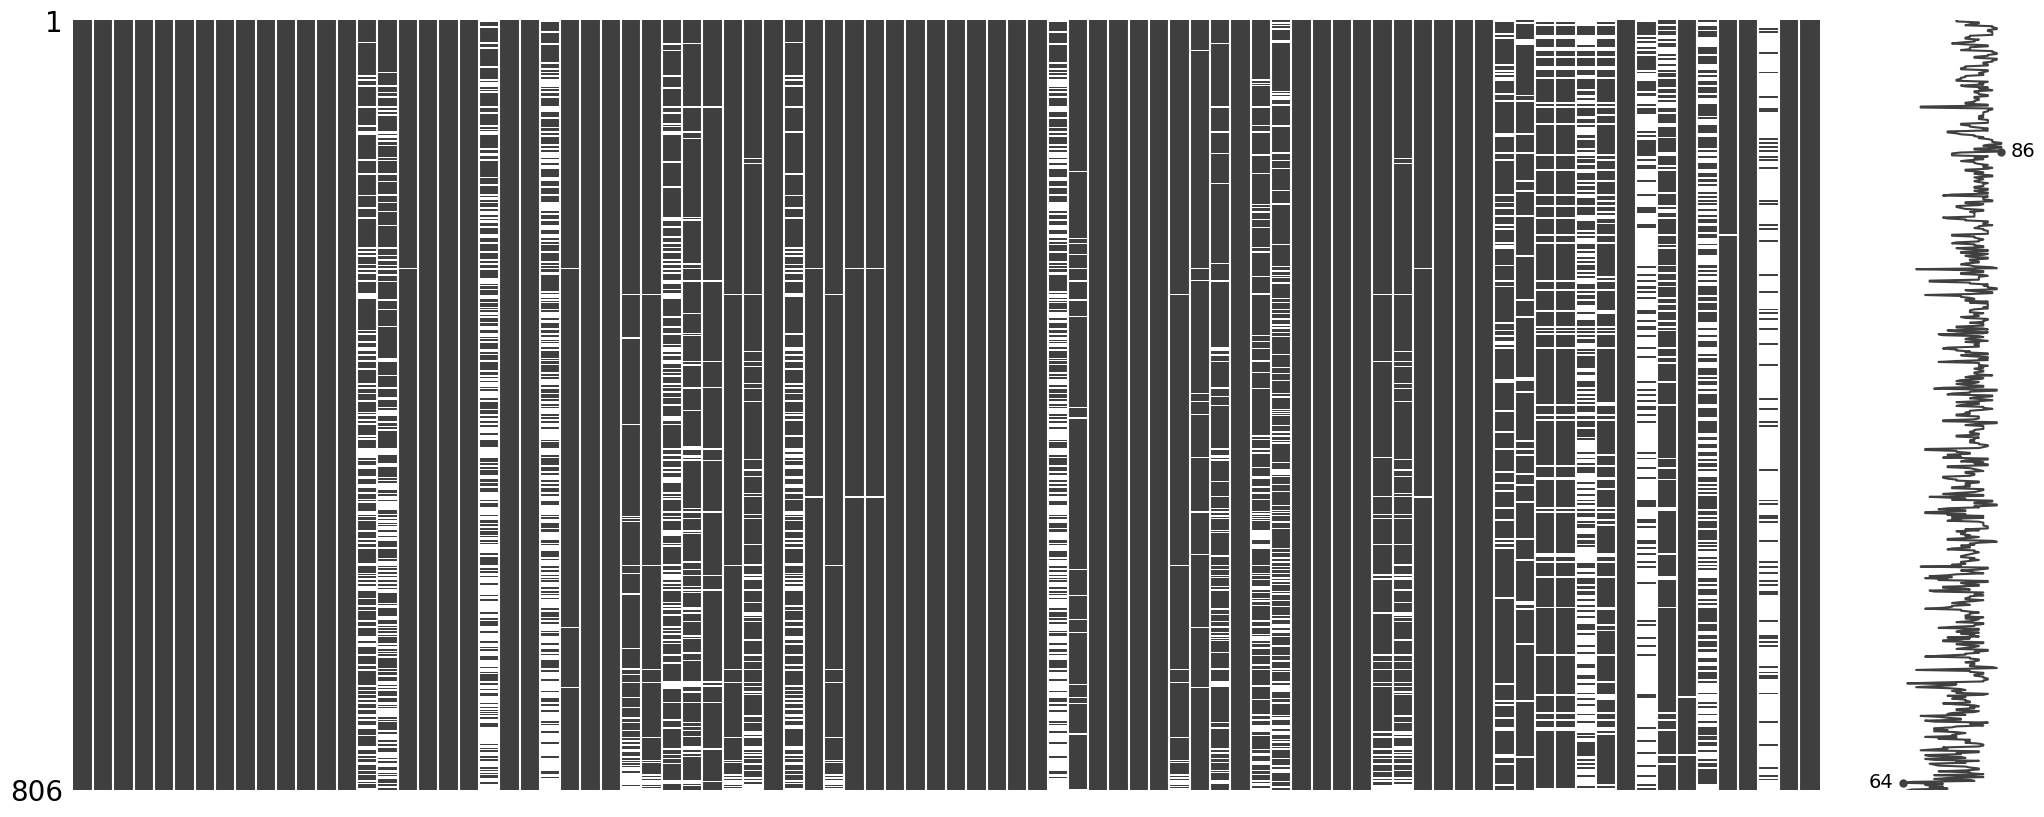

In [506]:
print(msno.matrix(df))

In [507]:
# se visualiza de las columnas en las que hay missings en la columna de empleados normal, cuantos missings hay en la de dealroom
print(df['Numero empleados'].isna().sum())
print(df[df['Numero empleados'].isna()]['n_empleados_dealroom'].isna().sum())
# hay 10 valores que no hay en la columna de sabi, pero si en la de dealroom, por lo que se indica
df['Numero empleados']= df['Numero empleados'].fillna(df['n_empleados_dealroom'])
# Ahora solo quedan 70 valores nulos en la columna de empleados, que son los que no tienen en ninguno de las dos df

80
70


In [508]:
# se quita la columna de n_empleados_dealroom
df= df.drop('n_empleados_dealroom', axis=1)

In [509]:
df.columns

Index(['Codigo_NIF', 'Nombre_sabi', 'Localidad', 'Fecha constitucion',
       'Codigo consolidacion', 'Codigo primario CNAE 2009', 'Forma juridica',
       'Forma juridica detallada', 'Estado', 'Estado detallado',
       'Capital social mil EUR', 'Free capital mil EUR',
       'Porcentaje_adquisicion_cat', 'year', 'Acreedores a L. P. mil EUR',
       'Acreedores comerciales mil EUR', 'Activo circulante mil EUR',
       'Apalancamiento (%) %', 'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Existencias mil EUR', 'Fondo de maniobra mil EUR',
       'Fondos propios mil EUR', 'Gastos financieros mil EUR',
       'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotacion mil EUR', 'Inmovilizado inmaterial mil EUR',
       'Inmovilizado material mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Numero empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR'

# Ideas de creacion de variables

In [510]:
# Tiempo que lleva la empresa en el mercado
# Tiempo desde creacion hasta primer round
# Tiempo desde primer round hasta ultimo round

CREACION DE NUEVAS VARIABLES EN EL NUEVO DATAFRAME

In [511]:
df['Fecha constitucion']=pd.to_datetime(df['Fecha constitucion'], format='%Y/%m/%d')

In [512]:
#se crea una variable para conocer los ai±os que lleva la empresa en el mercado
df['Ai±os en Mercado']= (2023-df['Fecha constitucion'].dt.year)
columnas = list(df.columns)
columnas.remove('Ai±os en Mercado')

# se altera el orden de las columnas para que los ai±os en el mercado vayan despues de la fecha de constitucion
columnas = columnas[:columnas.index("Fecha constitucion")+1] + ['Ai±os en Mercado'] + columnas[columnas.index("Fecha constitucion")+1:]
df = df.reindex(columns=columnas)

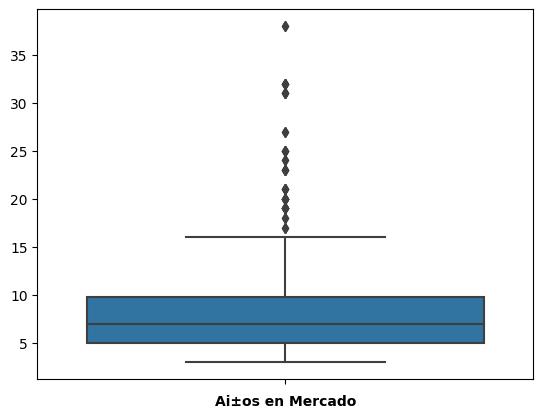

In [513]:
#Boxplot de la valoraciones en 2022.
sns.boxplot(y=df['Ai±os en Mercado'])
plt.xlabel('Ai±os en Mercado', weight='bold')
plt.ylabel('', weight='bold')
plt.show()

In [514]:
df['last_funding_date']=pd.to_datetime(df['last_funding_date'], format='%Y/%m/%d')

In [515]:
#se crea una variable para conocer los ai±os desde que se realizon la ultima financiacion.
df['Ai±os desde ultima financiacion']= (2023-df['last_funding_date'].dt.year)
df['Ai±os desde ultima financiacion'].fillna(0, inplace=True)
df['Ai±os desde ultima financiacion'] = df['Ai±os desde ultima financiacion'].astype(int)

# se altera el orden de las columnas para que los ai±os desde ultima financiacion vayan despues de la fecha de ultima financiacion.
columnas = list(df.columns)
columnas.remove('Ai±os desde ultima financiacion')
columnas = columnas[:columnas.index('last_funding_date')+1] + ['Ai±os desde ultima financiacion'] + columnas[columnas.index('last_funding_date')+1:]
df = df.reindex(columns=columnas)

In [516]:
# se calcula el porcentaje de missings en cada columna
(df.isna().sum()/len(df))[df.isna().sum()/len(df)>.1].sort_values(ascending=False)

valuation_2022                                    0.851117
last_funding                                      0.523573
Rotacion de las existencias %                     0.519851
Existencias mil EUR                               0.519851
Deudas financieras mil EUR                        0.476427
revenue_models                                    0.446650
Acreedores comerciales mil EUR                    0.302730
Acreedores a L. P. mil EUR                        0.244417
Inmovilizado inmaterial mil EUR                   0.235732
Pasivo fijo mil EUR                               0.212159
Impuestos sobre sociedades mil EUR                0.209677
last_round                                        0.171216
Gastos financieros y gastos asimilados mil EUR    0.169975
ownerships                                        0.166253
tagline                                           0.138958
first_funding_date                                0.116625
last_funding_date                                 0.1166

In [517]:
# entre las filas que tienen missings en last_funding, se hace un conteo de los valores de last_round
df[df['last_funding'].isna()]['last_round'].value_counts()

SUPPORT PROGRAM    256
SEED                24
ACQUISITION          8
GRANT                8
LATE VC              6
EARLY VC             4
SERIES A             2
SPINOUT              2
Name: last_round, dtype: int64

In [518]:
# se ven cuantas filas tienen missing la columna de last_funding entre las que valuation_2022 no es missing
print(df[(df['last_funding'].isna()) & (df['valuation_2022'].notna())].shape)
print(df[df['valuation_2022'].notna()].shape)
# una de cada 4 empresas que tiene valoracion en 2022 tiene missing en last_funding, asi que estari­a bien imputarla

(32, 87)
(120, 87)


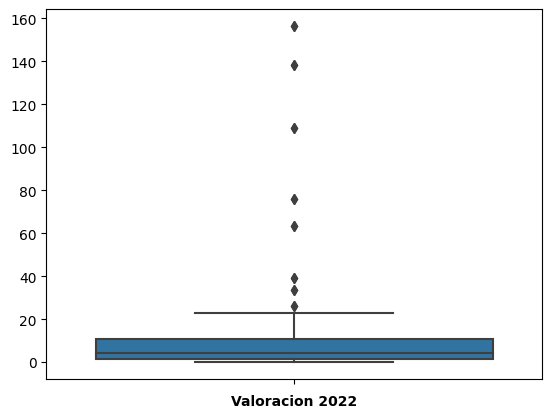

In [519]:
#Boxplot de la valoraciones en 2022.
sns.boxplot(y=df['valuation_2022'])
plt.xlabel('Valoracion 2022', weight='bold')
plt.ylabel('', weight='bold')
plt.show()

In [520]:
df['Codigo primario CNAE 2009'].value_counts() 

7112    100
6201     74
6209     66
6202     42
7022     34
       ... 
124       2
4647      2
4719      2
4765      2
2620      2
Name: Codigo primario CNAE 2009, Length: 131, dtype: int64

# Otras cosas a hacer

In [521]:
# Quitar columna forma juridica o forma juridica detallada, lo mismo con estado y estado detallado
df= df.drop('Forma juridica detallada', axis=1)
df= df.drop('Estado detallado', axis=1)

In [522]:
# Quitar columnas con muchos missings (ejemplo: deuda)


In [523]:
print(df['ownerships'].value_counts())
print(df['ownerships'].isna().sum())

accelerator                                     502
Venture Capital;accelerator                      82
Angel;Venture Capital;accelerator                12
Venture Capital;Crowdfunded;accelerator          10
not known                                        10
Venture Capital                                  10
bootstrapped                                     10
Subsidiary                                        6
Subsidiary;accelerator                            6
Subsidiary;Venture Capital;accelerator            4
Angel;Venture Capital                             4
Angel                                             2
Angel;accelerator                                 2
Private Equity;accelerator                        2
Private Equity;Venture Capital                    2
Private Equity;Subsidiary                         2
Public                                            2
Subsidiary;Angel;Venture Capital;accelerator      2
not known;bootstrapped                            2
Name: owners

In [524]:
df[columnas_financieras].isna().sum()

Codigo_NIF                                                      0
year                                                            0
Acreedores a L. P. mil EUR                                    197
Acreedores comerciales mil EUR                                244
Activo circulante mil EUR                                       1
Apalancamiento (%) %                                            0
Capital suscrito mil EUR                                        0
Cash flow mil EUR                                               0
Deudas financieras mil EUR                                    384
EBITDA mil EUR                                                  0
Endeudamiento (%) %                                             0
Existencias mil EUR                                           419
Fondo de maniobra mil EUR                                       3
Fondos propios mil EUR                                          0
Gastos financieros mil EUR                                      0
Importe ne

In [525]:
df['n_missings']=df.isna().sum(axis=1)
x=pd.DataFrame(df['n_missings'])

In [526]:
df['Inmovilizado mil EUR']=df['Inmovilizado mil EUR'].fillna(df['Inmovilizado material mil EUR'].fillna(0)+df['Inmovilizado inmaterial mil EUR'].fillna(0))
df['Activo circulante mil EUR']=df['Activo circulante mil EUR'].fillna(df['Existencias mil EUR'].fillna(0))
df['Total activo mil EUR']=df['Total activo mil EUR'].fillna(df['Inmovilizado mil EUR'].fillna(0)+df['Activo circulante mil EUR'].fillna(0))

In [527]:
print((df['Activo circulante mil EUR']==df['Activo circulante mil EUR'].fillna(df['Total activo mil EUR'] - df['Inmovilizado mil EUR'])).sum())
print((df['Inmovilizado mil EUR']==df['Inmovilizado mil EUR'].fillna(df['Total activo mil EUR'] - df['Activo circulante mil EUR'])).sum())

806
806


In [528]:
#Sabiendo que -> df['Pasivo fijo mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Acreedores a L. P. mil EUR'].fillna(0)+df['Deudas financieras mil EUR'])
a= df['Pasivo liquido mil EUR']== df['Deudas financieras mil EUR'].fillna(0)+df['Acreedores comerciales mil EUR'].fillna(0)
print(a.sum())
b= df['Activo circulante mil EUR']== df['Existencias mil EUR'].fillna(0)+df['Deudores mil EUR'].fillna(0)+ df['Tesoreria mil EUR'].fillna(0)
print(b.sum())
print(df.shape)

6
286
(806, 85)


In [529]:
# df['Fondos propios mil EUR']=df['Fondos propios mil EUR'].fillna(df['Capital suscrito mil EUR'].fillna(0)+df['Otros fondos propios mil EUR'].fillna(0))
df['Pasivo fijo mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Total pasivo y capital propio mil EUR'].fillna(0)-df['Pasivo liquido mil EUR'].fillna(0)-df['Fondos propios mil EUR'].fillna(0))
df['Pasivo liquido mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Total pasivo y capital propio mil EUR'].fillna(0)-df['Pasivo fijo mil EUR'].fillna(0)-df['Fondos propios mil EUR'].fillna(0))
df['Total pasivo']=(df['Pasivo fijo mil EUR'].fillna(0)+df['Pasivo liquido mil EUR'].fillna(0))

df['Acreedores comerciales mil EUR']=df['Acreedores comerciales mil EUR'].fillna(+df['Pasivo fijo mil EUR']-df['Deudas financieras mil EUR'])
df['Deudas financieras mil EUR']=df['Deudas financieras mil EUR'].fillna(+df['Pasivo fijo mil EUR']-df['Acreedores comerciales mil EUR'])


In [530]:
# imputamos numero de empleados con gastos de personal y coste medio por empleado
df['Numero empleados']=df['Numero empleados'].fillna(df['Gastos de personal mil EUR']/df['Coste medio de los empleados mil'])
df['Coste medio de los empleados mil']=df['Coste medio de los empleados mil'].fillna(df['Gastos de personal mil EUR']/df['Numero empleados'])
df['Gastos de personal mil EUR']=df['Gastos de personal mil EUR'].fillna(df['Numero empleados']*df['Coste medio de los empleados mil'])


In [531]:
# imputamos el coste medio de los empleados haciendo una media por sector


In [532]:
df[columnas_financieras].isna().sum()

Codigo_NIF                                                      0
year                                                            0
Acreedores a L. P. mil EUR                                    197
Acreedores comerciales mil EUR                                148
Activo circulante mil EUR                                       0
Apalancamiento (%) %                                            0
Capital suscrito mil EUR                                        0
Cash flow mil EUR                                               0
Deudas financieras mil EUR                                    148
EBITDA mil EUR                                                  0
Endeudamiento (%) %                                             0
Existencias mil EUR                                           419
Fondo de maniobra mil EUR                                       3
Fondos propios mil EUR                                          0
Gastos financieros mil EUR                                      0
Importe ne

In [533]:
df['Resultado Explotacion mil EUR']==df['Ingresos de explotacion mil EUR']+df['Importe neto Cifra de Ventas mil EUR']

0      False
1      False
2      False
3      False
4      False
       ...  
801    False
802    False
803    False
804    False
805    False
Length: 806, dtype: bool

In [534]:
df['Resultado financiero mil EUR']==df['Ingresos de explotacion mil EUR']-df['Gastos financieros mil EUR']

0      False
1      False
2      False
3      False
4      False
       ...  
801    False
802    False
803    False
804    False
805    False
Length: 806, dtype: bool

In [535]:
(df['Resultado Actividades Ordinarias mil EUR']==df['Result. ordinarios antes Impuestos mil EUR']- df['Impuestos sobre sociedades mil EUR'].fillna(0)).sum()

572

In [536]:
#Realiza estos calculos si alguna de estas columnas es nula, y sustituye el valor nulo por el calculado
df['Impuestos sobre sociedades mil EUR']=df['Impuestos sobre sociedades mil EUR'].fillna(df['Result. ordinarios antes Impuestos mil EUR']-df['Resultado Actividades Ordinarias mil EUR'])

In [537]:
df[columnas_financieras].isna().sum()

Codigo_NIF                                                      0
year                                                            0
Acreedores a L. P. mil EUR                                    197
Acreedores comerciales mil EUR                                148
Activo circulante mil EUR                                       0
Apalancamiento (%) %                                            0
Capital suscrito mil EUR                                        0
Cash flow mil EUR                                               0
Deudas financieras mil EUR                                    148
EBITDA mil EUR                                                  0
Endeudamiento (%) %                                             0
Existencias mil EUR                                           419
Fondo de maniobra mil EUR                                       3
Fondos propios mil EUR                                          0
Gastos financieros mil EUR                                      0
Importe ne

In [538]:
# Quitar columnas que no aportan informacion (ejemplo: nombre de la empresa, pagina web, ciudad, etc)
df= df.drop('Localidad', axis=1)
# quitamos la columna de codigo de consolidacion porque casi todos los valores son de un tipo
df= df.drop('Codigo consolidacion', axis=1)
# quitamos la columna de estado porque son todos activas
df= df.drop('Estado', axis=1)
# quitamos tagline 
df= df.drop('tagline', axis=1)
# tambien website
df= df.drop('website', axis=1)
# profile_url
df= df.drop('profile_url', axis=1)
# name_dealroom porque ya salen en sabi
df= df.drop('name_dealroom', axis=1)
# n_missings
df= df.drop('n_missings', axis=1)
# forma juridica
df= df.drop('Forma juridica', axis=1)
# resultado de actividades ordinarias porque es igual que resultado del ejercicio
df= df.drop('Resultado Actividades Ordinarias mil EUR', axis=1)
# quitamos los inmovilizados materiales e inmateriales y nos quedamos con inmovilizado
df= df.drop('Inmovilizado material mil EUR', axis=1)
df= df.drop('Inmovilizado inmaterial mil EUR', axis=1)
# eliminamos existencias y â‚¬ % existencias
df= df.drop('Existencias mil EUR', axis=1)
df= df.drop('Rotacion de las existencias %', axis=1)
# quitamos dotaciones para amortizaciones de inmovilizado
df= df.drop('Dotaciones para amortiz. de inmovil. mil EUR', axis=1)

In [539]:
df.shape

(806, 71)

In [540]:
df['n_missings']=df.isna().sum(axis=1)
x['df_missings_final']= df['n_missings']

In [541]:
# buscamos los total_funding que son 0
print(df[df['total_funding']==0].shape)
# cuando el total_funding es 0, el last_funding tambii©n lo imputamos como 0
df.loc[df['total_funding']==0, 'last_funding']=0
# lo mismo con el last_funding_date y first_funding_date
df.loc[df['total_funding']==0, 'last_funding_date']=0
df.loc[df['total_funding']==0, 'first_funding_date']=0

# creamos ratio de last_funding sobre total_funding
df['ratio_last_funding']=df['last_funding']/df['total_funding']

(94, 72)


In [542]:
print(df['total_funding'].describe())
print(df['total_funding'].isna().sum())
print(df['ratio_last_funding'].describe())

count    744.000000
mean       0.875685
std        6.169764
min        0.000000
25%        0.030000
50%        0.050000
75%        0.150000
max      100.000000
Name: total_funding, dtype: float64
62
count    384.000000
mean       0.453827
std        0.330020
min        0.003546
25%        0.166667
50%        0.400000
75%        0.737500
max        1.000000
Name: ratio_last_funding, dtype: float64


In [543]:
df.columns

Index(['Codigo_NIF', 'Nombre_sabi', 'Fecha constitucion', 'Ai±os en Mercado',
       'Codigo primario CNAE 2009', 'Capital social mil EUR',
       'Free capital mil EUR', 'Porcentaje_adquisicion_cat', 'year',
       'Acreedores a L. P. mil EUR', 'Acreedores comerciales mil EUR',
       'Activo circulante mil EUR', 'Apalancamiento (%) %',
       'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Fondo de maniobra mil EUR', 'Fondos propios mil EUR',
       'Gastos financieros mil EUR', 'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotacion mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Numero empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR',
       'Pasivo liquido mil EUR', 'Periodo de cobro (dias) dias',
       'Ratio de liquidez %', 'Ratio de solvencia %',
       'Rentabilidad economica (%) %', 'Rentabilidad financiera (%) %',
       'Resu

In [544]:
# correlacion entre variables numericas con valoracion 2022
print(df.corr()['valuation_2022'].sort_values(ascending=False).nsmallest(25))

EBIT mil EUR                                                 -4.184715e-01
Resultado Explotacion mil EUR                                -4.184715e-01
Resultado del Ejercicio mil EUR                              -4.107880e-01
Result. ordinarios antes Impuestos mil EUR                   -4.044545e-01
ratio_last_funding                                           -3.289855e-01
EBITDA mil EUR                                               -2.903775e-01
Cash flow mil EUR                                            -2.666849e-01
Endeudamiento (%) %                                          -1.813299e-01
n_missings                                                   -1.454330e-01
Apalancamiento (%) %                                         -7.008792e-02
Rotacion de activos netos %                                  -6.241934e-02
Resultado financiero mil EUR                                 -6.014824e-02
Free capital mil EUR                                         -5.579851e-02
Valor agregado mil EUR   

C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\3025638534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['valuation_2022'].sort_values(ascending=False).nsmallest(25))


In [545]:
print(df.corr()['valuation_2022'].sort_values(ascending=False).nlargest(25))

valuation_2022                                    1.000000
Activo circulante mil EUR                         0.573366
Importe neto Cifra de Ventas mil EUR              0.568711
Tesoreria mil EUR                                 0.563689
Fondo de maniobra mil EUR                         0.552891
Deudores mil EUR                                  0.551361
Total pasivo y capital propio mil EUR             0.535204
Total activo mil EUR                              0.535204
Fondos propios mil EUR                            0.511963
Ingresos de explotacion mil EUR                   0.509509
last_funding                                      0.509050
Acreedores comerciales mil EUR                    0.504329
total_funding                                     0.504268
Otros fondos propios mil EUR                      0.466787
Gastos financieros y gastos asimilados mil EUR    0.451119
Deudas financieras mil EUR                        0.440205
Pasivo liquido mil EUR                            0.4132

C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\4027841673.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['valuation_2022'].sort_values(ascending=False).nlargest(25))


In [546]:
# calculamos el porcentaje de missings en cada columna cuando la columna de valoracion 2022 no es missing
(df[df['valuation_2022'].notna()].isna().sum()/len(df[df['valuation_2022'].notna()]))[df[df['valuation_2022'].notna()].isna().sum()/len(df[df['valuation_2022'].notna()])>.01].sort_values(ascending=False)

ratio_last_funding                                            0.266667
last_funding                                                  0.250000
revenue_models                                                0.150000
Importe neto Cifra de Ventas mil EUR                          0.125000
Acreedores a L. P. mil EUR                                    0.091667
Acreedores comerciales mil EUR                                0.083333
Deudas financieras mil EUR                                    0.083333
Gastos financieros y gastos asimilados mil EUR                0.083333
last_round                                                    0.066667
Numero empleados                                              0.033333
Coste medio de los empleados mil                              0.033333
ownerships                                                    0.033333
Ingresos de explotacion mil EUR                               0.016667
Margen de beneficio (%) %                                     0.016667
Period

In [547]:
# hacer el calculo de la diferencia entre las variables en el 2020 y 2021 (asi­ se puede sustituir por el valor del 2020)

CREACIoN DEL DATAFRAME **DF Valoracion**

In [548]:
# Primero creamos el df que esti© preparado para hacer el modelo de valoracion de empresas
# buscamos cuando valoracion no es na
df_valoracion= df[df['valuation_2022'].notna()]
df_valoracion.shape

(120, 73)

In [549]:
df_valoracion['Nombre_sabi'].unique().shape # 60 empresas con valoracion

(60,)

CREACION DE RATIOS EN EL DF Valoracion

In [550]:
# precio/ventas
# precio/ebitda
# precio/ebit
# precio/benecios (si tienen)
# tasa crecimiento ventas
# tasa crecimiento ingresos
# tasa crecimiento beneficios
# ratio de liquidez
# ratio de endeudamiento
# margen bruto
# Cash Burn Rate

In [551]:
#Realiza estos calculos si alguna de estas columnas es nula, y sustituye el valor nulo por el calculado
df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
df_valoracion['Precio/Ebit']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBIT mil EUR'].fillna(0))

C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\3865386596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\3865386596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
C:\Users\unaim\AppData\Local\Te

In [552]:
df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
df_valoracion['Precio/Ebit']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBIT mil EUR'].fillna(0))

C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\3444534114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\3444534114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
C:\Users\unaim\AppData\Local\Te

In [553]:
df_valoracion['Ratio_liquidez']=((df_valoracion['Activo circulante mil EUR'].fillna(0))/(df_valoracion['Pasivo liquido mil EUR'].fillna(0)))
df_valoracion['Ratio_endeudamiento']=df_valoracion['Total pasivo y capital propio mil EUR']/df_valoracion['Total pasivo']

df_valoracion['Costes de los trabajadores']=df_valoracion['Costes de los trabajadores / Ingresos de explotacion (%) %']*df_valoracion['Ingresos de explotacion mil EUR']/100
df_valoracion['Margen_bruto(costes trabajadores)']=(df_valoracion['Ingresos de explotacion mil EUR']-df_valoracion['Costes de los trabajadores'])/(df_valoracion['Ingresos de explotacion mil EUR']*100)

C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\1236574215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Ratio_liquidez']=((df_valoracion['Activo circulante mil EUR'].fillna(0))/(df_valoracion['Pasivo liquido mil EUR'].fillna(0)))
C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\1236574215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Ratio_endeudamiento']=df_valoracion['Total pasivo y capital propio mil EUR']/df_valoracion['Total pasivo']
C:\Users\unaim\AppData\

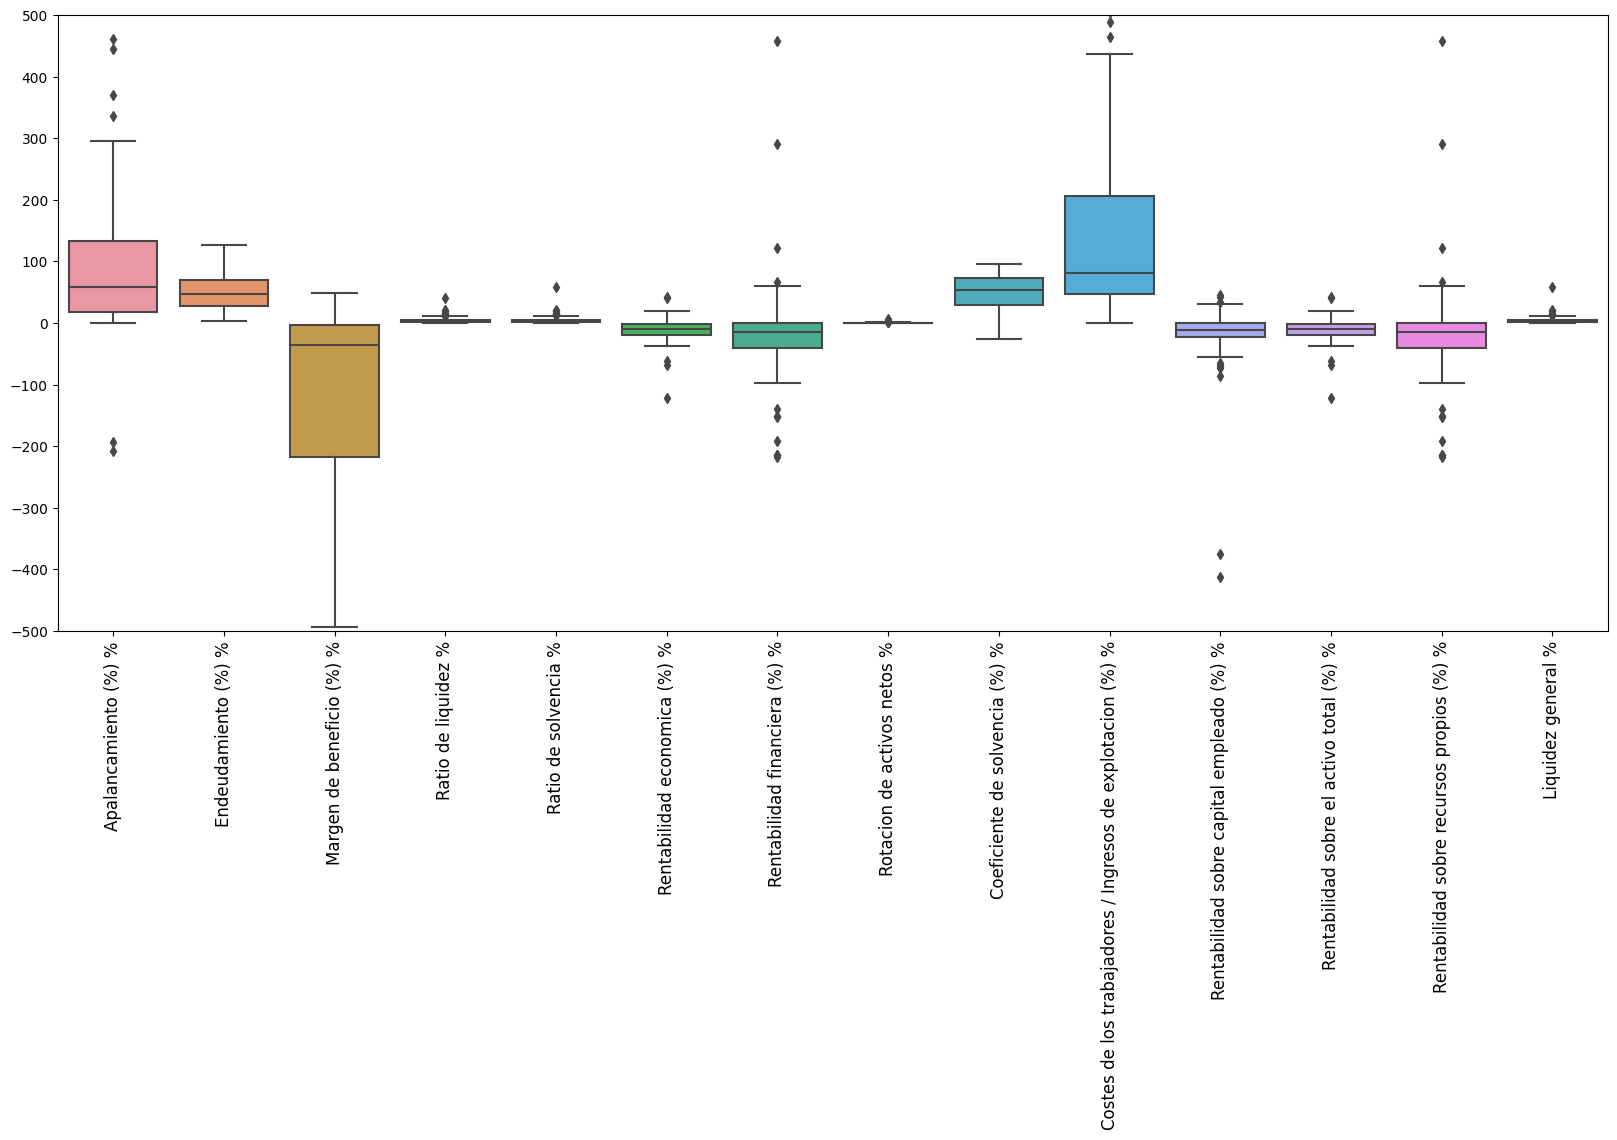

In [554]:
#Se realizan boxplots de las columnas numericas que esten mostradas en %.
df_porcentaje = df_valoracion.loc[:, df_valoracion.columns.str.contains('%')]
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df_porcentaje, ax=ax)
plt.xticks(rotation=90)
ax.set_ylim(-500, 500)
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.show()

In [555]:
#Se reemplazan valores infinitos con 0.
df_valoracion['Precio/Venta']=df_valoracion['Precio/Venta'].replace([np.inf, -np.inf], 0)
df_valoracion['Ratio de liquidez %']=df_valoracion['Ratio de liquidez %'].replace([np.inf, -np.inf], 0)

C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\1185266293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Venta']=df_valoracion['Precio/Venta'].replace([np.inf, -np.inf], 0)
C:\Users\unaim\AppData\Local\Temp\ipykernel_22612\1185266293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Ratio de liquidez %']=df_valoracion['Ratio de liquidez %'].replace([np.inf, -np.inf], 0)


In [556]:
columnas_financieras

Index(['Codigo_NIF', 'year', 'Acreedores a L. P. mil EUR',
       'Acreedores comerciales mil EUR', 'Activo circulante mil EUR',
       'Apalancamiento (%) %', 'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Existencias mil EUR', 'Fondo de maniobra mil EUR',
       'Fondos propios mil EUR', 'Gastos financieros mil EUR',
       'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotacion mil EUR', 'Inmovilizado inmaterial mil EUR',
       'Inmovilizado material mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Numero empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR',
       'Pasivo liquido mil EUR', 'Periodo de cobro (dias) dias',
       'Ratio de liquidez %', 'Ratio de solvencia %',
       'Rentabilidad economica (%) %', 'Rentabilidad financiera (%) %',
       'Result. ordinarios antes Impuestos mil EUR',
       'Resultado Actividades Ordinarias 

In [566]:
variables_financieras_eliminadas= ['Resultado Actividades Ordinarias mil EUR', 'Inmovilizado material mil EUR',
 'Inmovilizado inmaterial mil EUR', 'Existencias mil EUR', 'Rotacion de las existencias %', 
 'Dotaciones para amortiz. de inmovil. mil EUR']
columnas_financieras_completas= columnas_financieras.drop(['year', 'Codigo_NIF', 'n_missings']).drop(variables_financieras_eliminadas)
columnas_financieras_completas= columnas_financieras_completas.append(pd.Index(['Total pasivo']))

df_pivotado= df.pivot_table(index='Codigo_NIF', columns='year', values=columnas_financieras_completas,)

In [567]:
# se calcula el ratio de crecimiento de las variables financieras entre 2020 y 2021
df_pivotado_ratios= pd.DataFrame()
for col in df_pivotado.columns.get_level_values(0):
    df_pivotado_ratios[col+'_ratio']=df_pivotado[col][2021]/df_pivotado[col][2020]
df_pivotado_ratios= df_pivotado_ratios.reset_index()

In [568]:
# se pasan las columnas de los años de df_pivotado como sufijo de las columnas de df_pivotado
df_pivotado.columns= df_pivotado.columns.map('{0[0]}_{0[1]}'.format)
df_pivotado= df_pivotado.reset_index()
# luego se añaden el resto de columnas de df seleccionando las que no estan en df_pivotado
columnas= columnas_financieras_completas.tolist()
df_adquisicion_completo= pd.merge(df_pivotado, df.loc[:,~df.columns.isin(columnas)], on= 'Codigo_NIF', how='left')

# se quitan las filas duplicadas
df_adquisicion_completo= df_adquisicion_completo.drop('n_missings', axis=1)
# se quita 1 de cada 2 filas porque hay duplicados
df_adquisicion_completo= df_adquisicion_completo.drop_duplicates(subset='Codigo_NIF', keep='first')

df_adquisicion_completo

,Codigo_NIF,Acreedores a L. P. mil EUR_2020,Acreedores a L. P. mil EUR_2021,Acreedores comerciales mil EUR_2020,Acreedores comerciales mil EUR_2021,Activo circulante mil EUR_2020,Activo circulante mil EUR_2021,Apalancamiento (%) %_2020,Apalancamiento (%) %_2021,Capital suscrito mil EUR_2020,...,total_rounds,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022,b2b,b2c,ratio_last_funding
0,A48464788,2000.08371,4064.24000,1266.76386,1109.99100,9702.80900,1.089652e+04,17.333,38.070,745.33015,...,1,accelerator,business,manufacturing,late growth,operational,NaN,1,0,1.000000
2,A48500052,NaN,NaN,601.99724,268.59101,2020.73863,1.655867e+03,3.714,3.836,291.48500,...,1,NaN,business,marketplace & ecommerce,seed,operational,NaN,1,0,1.000000
4,A78053147,16336.00000,15314.00000,346970.00000,339928.00000,931984.00000,1.032835e+06,122.989,147.861,2000.00000,...,0,bootstrapped,business,saas,early growth,operational,NaN,1,0,NaN
6,A95291613,1679.45236,1461.10743,29.42460,329.67108,2149.57949,3.662167e+03,143.954,249.142,213.50000,...,24,NaN,business,NaN,late growth,operational,NaN,1,0,0.035714
8,A95363859,37146.00000,37482.00000,17485.00000,14522.00000,106811.00000,9.370000e+04,22.938,22.586,13301.00000,...,1,Public,business,manufacturing,late growth,operational,NaN,1,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,B95986733,190.37539,38.40433,NaN,NaN,46.56125,6.810650e+01,-9808.209,210.113,3.00000,...,3,accelerator,business,manufacturing,seed,operational,NaN,1,0,NaN
798,B95987319,175.00000,671.00796,11.85300,203.77460,264.06800,6.866940e+02,73.760,105.216,3.37200,...,7,Venture Capital;accelerator,business,saas,early growth,operational,4.32,1,0,NaN
800,B95989059,272.87914,242.17619,69.31906,74.04327,162.67544,1.984251e+02,5694.805,-509.103,60.00000,...,6,accelerator,business,saas,seed,operational,NaN,1,0,0.333333
802,B95990164,90.31462,1237.47139,NaN,NaN,42.28499,3.860934e+02,3105.761,-1770.621,3.05000,...,8,Subsidiary;Angel;Venture Capital;accelerator,business,saas,early growth,acquired,6.62,1,0,NaN


In [560]:
# se añaden el resto de columnas de df al df_pivotado_ratios
df_adquisicion_ratio= pd.concat([df_pivotado_ratios, df.loc[:,~df.columns.isin(columnas)]], axis=1)
df_adquisicion_ratio

,Codigo_NIF,Acreedores a L. P. mil EUR_ratio,Acreedores comerciales mil EUR_ratio,Activo circulante mil EUR_ratio,Apalancamiento (%) %_ratio,Capital suscrito mil EUR_ratio,Cash flow mil EUR_ratio,Coeficiente de solvencia (%) %_ratio,Coste medio de los empleados mil_ratio,Costes de los trabajadores / Ingresos de explotacion (%) %_ratio,...,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022,b2b,b2c,n_missings,ratio_last_funding
0,A48464788,2.032035,0.876241,1.123027,2.196388,1.00000,1.084481,0.867002,1.079142,1.046273,...,bootstrapped,business,saas,early growth,operational,NaN,1,0,5,NaN
1,A48500052,NaN,0.446167,0.819437,1.032849,1.00000,0.972424,1.188221,1.023458,0.974969,...,bootstrapped,business,saas,early growth,operational,NaN,1,0,5,NaN
2,A78053147,0.937439,0.979704,1.108211,1.202229,1.00000,0.028017,0.881491,1.299568,1.017570,...,accelerator,business,NaN,late growth,operational,NaN,1,0,4,NaN
3,A95291613,0.869990,11.203927,1.703667,1.730706,0.74459,0.185162,0.501350,1.228400,0.560756,...,accelerator,business,NaN,late growth,operational,NaN,1,0,4,NaN
4,A95363859,1.009045,0.830540,0.877250,0.984654,1.00000,1.389099,1.024902,0.960552,0.682127,...,NaN,business,NaN,late growth,operational,NaN,1,0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,accelerator,business,NaN,seed,operational,NaN,1,0,7,NaN
802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,accelerator,business,NaN,seed,operational,NaN,1,0,12,0.333333
803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,accelerator,business,NaN,seed,operational,NaN,1,0,8,0.333333
804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not known;bootstrapped,business,NaN,seed,operational,NaN,1,0,15,NaN
